# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# it will prevent the UI rendering, which speeds things up considerably.

env = UnityEnvironment(file_name="Reacher_Multi.app") 


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
import os
data_prefix = './data/ppo-2019-03-27-'
s_currentpath = os.getcwd()

In [6]:
# DDPG:
#   BATCH_SIZE: 200
#   BUFFER_SIZE: 100000
#   GAMMA: 0.99
#   LR_ACTOR: 0.0001
#   LR_CRITIC: 0.001
#   TAU: 0.001
#   UPDATE_EVERY: 2
#   WEIGHT_DECAY: 0.0001

from ppo.agent import Agent as PPO
rand_seed = 0
# agent = DDPG(state_size, action_size, num_agents, rand_seed)
agent = PPO(state_size, action_size, num_agents, rand_seed)
SOLVED = False

print('\nNeural Network Model ARCHITECURES:')

print(agent.policy.actor_body)
print(agent.policy.critic_body)



Neural Network Model ARCHITECURES:
Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
)
Critic(
  (fcs1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)


In [7]:
from collections import deque
import pickle
import torch
from ppo.trajectory import Trajectory
name = 'PPO'
episodes = 1500
rand_seed = 0

scores = []
scores_std = []
scores_avg = []
scores_window = deque(maxlen=100)  # last 100 scores
    
is_solved = False

print('\nTRAINING:')
# na = np.array([x.data for x in PPO_PARAMS]).flatten()
# d_params = dict([(na[y].strip(), float(na[y+1]))for y in range(0, len(na), 2)])
eps = episodes
beta = 0.01 # d_params['BETA']
for episode in range(episodes):
    
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations    

    trject = Trajectory()
    for i in range(1000):
        actions, log_probs, values = agent.act(states)
        
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        
        trject.add(states, rewards, log_probs, actions, values, dones)
        states = next_states
        if np.any(dones):
            break

    agent.step(trject, eps, beta)
    eps *= 0.999
    beta *= 0.995
    
    
    scores.append(trject.score)
    scores_window.append(trject.score)
    scores_avg.append(np.mean(scores_window))
    scores_std.append(np.std(scores_window))
    s_msg = '\rEpisode {}\tAverage Score: {:.2f}\tσ: {:.2f}\tScore: {:.2f}'
    print(s_msg.format(episode, np.mean(scores_window),
                       np.std(scores_window), trject.score), end="")
    if episode % 10 == 0:
        print(s_msg.format(episode, np.mean(scores_window),
                           np.std(scores_window), trject.score))
    if np.mean(scores_window) >= 30.:
        is_solved = True
        s_msg = '\n\nEnvironment solved in {:d} episodes!\tAverage '
        s_msg += 'Score: {:.2f}\tσ: {:.2f}'
        print(s_msg.format(episode, np.mean(scores_window),
                           np.std(scores_window)))
        # save the models
        s_aux = '%scheckpoint-%s.%s.pth'
        s_policy_path = s_aux % (data_prefix, name, 'policy')
        torch.save(agent.policy.state_dict(), s_policy_path)
        break
    
# save data to use later
if not is_solved:
    s_msg = '\n\nEnvironment not solved =/'
    print(s_msg.format(episode, np.mean(scores_window),
          np.std(scores_window)))
print('\n')
d_data = {'episodes': episode,
          'scores': scores,
          'scores_std': scores_std,
          'scores_avg': scores_avg,
          'scores_window': scores_window}
pickle.dump(d_data, open('%ssim-data-%s.data' % (data_prefix, name), 'wb'))


TRAINING:
Episode 0	Average Score: 0.13	σ: 0.00	Score: 0.13
Episode 10	Average Score: 1.02	σ: 0.61	Score: 1.60
Episode 20	Average Score: 1.50	σ: 0.71	Score: 2.56
Episode 30	Average Score: 1.80	σ: 0.75	Score: 2.69
Episode 40	Average Score: 2.09	σ: 0.86	Score: 2.51
Episode 50	Average Score: 2.37	σ: 0.97	Score: 3.19
Episode 60	Average Score: 2.57	σ: 1.04	Score: 4.52
Episode 70	Average Score: 2.88	σ: 1.25	Score: 3.78
Episode 80	Average Score: 3.03	σ: 1.25	Score: 4.33
Episode 90	Average Score: 3.20	σ: 1.30	Score: 3.35
Episode 100	Average Score: 3.38	σ: 1.30	Score: 5.58
Episode 110	Average Score: 3.78	σ: 1.14	Score: 5.88
Episode 120	Average Score: 4.17	σ: 1.15	Score: 5.32
Episode 130	Average Score: 4.58	σ: 1.20	Score: 6.75
Episode 140	Average Score: 5.04	σ: 1.39	Score: 7.29
Episode 150	Average Score: 5.48	σ: 1.54	Score: 6.99
Episode 160	Average Score: 5.93	σ: 1.57	Score: 8.62
Episode 170	Average Score: 6.24	σ: 1.60	Score: 7.88
Episode 180	Average Score: 6.63	σ: 1.51	Score: 8.36
Episode 190	

In [9]:
pickle.dump(d_data, open('%ssim-data-%s.data' % (data_prefix, name), 'wb'))

In [9]:
import pickle

d_data = pickle.load(open('%ssim-data-%s.data' % (data_prefix, name), 'rb'))
s_msg = 'Environment solved in {:d} episodes!\tAverage Score: {:.2f} +- {:.2f}'
print(s_msg.format(d_data['episodes'], np.mean(d_data['scores_window']), np.std(d_data['scores_window'])))

Environment solved in 889 episodes!	Average Score: 30.01 +- 4.11


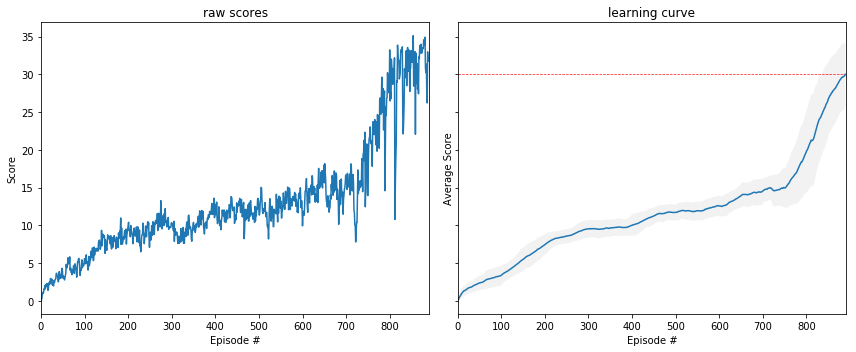

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

#recover data
na_raw = np.array(d_data['scores'])
na_mu = np.array(d_data['scores_avg'])
na_sigma = np.array(d_data['scores_std'])

# plot the scores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# plot the sores by episode
ax1.plot(np.arange(len(na_raw)), na_raw)
ax1.set_xlim(0, len(na_raw)+1)
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode #')
ax1.set_title('raw scores')

# plot the average of these scores
ax2.axhline(y=30., xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=0.7, alpha=0.9)
ax2.plot(np.arange(len(na_mu)), na_mu)
ax2.fill_between(np.arange(len(na_mu)), na_mu+na_sigma, na_mu-na_sigma, facecolor='gray', alpha=0.1)
ax2.set_ylabel('Average Score')
ax2.set_xlabel('Episode #')
ax2.set_title('learning curve')

f.tight_layout()
f.savefig(data_prefix + '%s-learning-curve.jpg' % name, format='jpg')

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```